# COGS 108 - Analysis of NBA Teams' Performance With and Without Fans

# Overview

For our project, we wanted to answer the “age-old” question of home-court advantage. In sporting events, for our case, basketball, home-court advantageous where a team plays in their home court where the majority of the fans there are rooting for them. We used NBA statistics from games pre-COVID and in the midst of COVID. Our expectation was that away teams would perform better and home teams would perform worse, since there was no longer a home-court advantage; however, our results say otherwise. In the case of free throws and total points scored, there was a significant difference between pre and midst COVID times. For both these categories, the average points scored was higher during COVID than before. The increase in free throw percentage can be attributed to the lack of distraction from fans; however, it is impossible to say that the total points scored was due to this since the trend of total points scored by team has slowly increased over the past 5 years.



# Names

- Anshul Singh
- Ryan Muinos
- Zane Calini
- Jonathan Trang

<a id='research_question'></a>
# Research Question

Does not having fans impact an NBA team's performances on the court (e.g. Wins, Free Throw %, Turnover %, 3 Points made) when compared to performances of home and away teams?

<a id='background'></a>

## Background & Prior Work

COVID-19 has impacted sports in that fans are no longer present at games, and that “home team advantages” have disappeared ever since the pandemic began. Many sports have seen results affected by games, with the biggest difference being a lack of fans in arenas. NBA crowds have the potential to affect games, as stadiums can be loud and fans can easily motivate teams to perform better. Raucous fans can potentially motivate a home team to perform better, which can lead to better team statistics like Free Throw Percentage, Turnover Percentage, and 3 Points made. The NBA has many well-recorded datasets that are publicly available to analyze. 

There has already been some work on determining if fans impact games, and in the first reference we found (1) - there was a slight presence of a “home court advantage”, but it was never enough to be a game-influencing factor. Meaning that if two teams were tied in a match, home court advantage wasn’t enough of a factor to lead one team to win over the other. In another paper (2), however, home court advantage had a significant positive influence for the home team’s statistics and a negative influence for away teams. While both of these references find the presence of a home team advantage, they do not base their findings on recently available data - since COVID 19 shut down home games very recently. With both references in mind, we will try to give a neutral opinion on the significance of “home court advantage” in NBA games.

References (include links):
- 1) https://www.researchgate.net/publication/4748913_Home_Advantage_in_the_NBA_as_a_Game-Long_Process
- 2) https://www.samford.edu/sports-analytics/fans/2020/The-Problem-with-No-Fans-at-the-NBA-Bubble-in-Orlando
- 3) https://www.cnbc.com/2020/12/11/studyhome-court-advantage-is-real-heres-how-it-could-affect-your-focus.html

# Hypothesis


We believe that the performance of NBA teams will have been impacted by fans no longer being at the games. Teams that flourished with the so-called “home-court advantage” no longer had this and would be negatively affected, while the opposing team would, as a result, be positively affected. This would lead to more NBA teams losing more home court games, as opposed to their previous years.


# Dataset(s)

Dataset #1 
- Name: Games 
- Link: https://www.kaggle.com/nathanlauga/nba-games?select=games.csv 
- Number of observations: 21494 
- This dataset contains data for all games in the NBA from 2004 to 2020. Each observation represents one game and includes both teams that played in that game, what season that game was played, who won, and stats such as points scored and assists for each team. This dataset also includes playoff games and games that were played in the NBA bubble in 2020. Each observation also denotes who was the home team and who was the away team and if the home team won. 
- Here are all the notable columns for each observation: 
- Game ID 
- Home Team 
- Away Team 
- Season 
- Home Team Win or Loss 
- Home Team Points 
- Home Team Field Goal Percentage 
- Home Team Three Throw Percentage 
- Home Team 3 Point Percentage 
- Home Team Assists 
- Home Team Rebounds 
- Away Team Points 
- Away Team Field Goal Percentage 
- Away Team Three Throw Percentage 
- Away Team 3 Point Percentage 
- Away Team Assists 
- Away Team Rebounds

Dataset #2: 
- Name: Games_Details 
- Link: https://www.kaggle.com/nathanlauga/nba-games?select=games_details.csv 
- Number of observations: 602768 
- This dataset contains data for all games in the NBA from 2004. This dataset is like the Games dataset but has many more observations as well as data for those observations. Each observation is a player on a team for each game. Each observation has the players statistics such as minutes played, points, Field Goal %, FT%, etc. The Dataset includes not only the previous (“normal”) season as well as the most recent bubble (“covid protocol no fans”) season.
- Game ID
- Team ID
- Team Abbreviation
- Team City
- Player ID
- Player Name
- Start Position
- Comment
- Min
- Field Goal Made
- Field Goal Attempt
- Field Goal %
- Field Goal 3 Made
- Field Goal 3 Attempt
- Field Goal 3 %
- Free Throw Made
- Free Throw  Attempt
- Free Throw %
- Offensive Rebounds
- Defensive Rebounds
- Rebounds
- Assists
- Steals
- Blocks
- Turnovers
- Points Forward
- Points
- Plus/Minus


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


games = pd.read_csv("games.csv")
games_details = pd.read_csv("games_details.csv")


# Data Cleaning

Describe your data cleaning steps here.

First we will look at our data below. We see that we have 24193 games, with a useless column called game status text.
Before we do anything though, we want to create two new dataframes, one with all games from January 1st 2015 till March 11th 2020, when the first game NBA was suspended to due the coronavirus pandemic and the second one containing all games from July 30th to October 11th 2020, which contains all games played in the Orlando bubble with no fans. We can't just the season column because some games in the 2020 season had fans and others didn't.  

In [2]:
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-03-21,22000645,Final,1610612748,1610612754,2020,1610612748,106.0,0.402,0.826,...,27.0,51.0,1610612754,109.0,0.388,0.900,0.333,27.0,50.0,0
1,2021-03-21,22000016,Final,1610612745,1610612760,2020,1610612745,112.0,0.494,0.741,...,22.0,38.0,1610612760,114.0,0.462,0.680,0.333,22.0,52.0,0
2,2021-03-21,22000646,Final,1610612743,1610612740,2020,1610612743,108.0,0.500,0.800,...,30.0,37.0,1610612740,113.0,0.482,0.767,0.286,26.0,45.0,0
3,2021-03-21,22000167,Final,1610612738,1610612753,2020,1610612738,112.0,0.455,1.000,...,27.0,45.0,1610612753,96.0,0.381,0.700,0.324,20.0,44.0,1
4,2021-03-21,22000647,Final,1610612751,1610612764,2020,1610612751,113.0,0.489,0.727,...,24.0,35.0,1610612764,106.0,0.532,0.789,0.333,24.0,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
24191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
24192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
24193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [3]:
games_fans = games[(games['GAME_DATE_EST'] > '2015-01-01') & (games['GAME_DATE_EST'] <= '2020-03-11')]
games_fans.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
929,2020-03-11,21900971,Final,1610612755,1610612765,2019,1610612755,124.0,0.506,0.813,...,28.0,50.0,1610612765,106.0,0.464,0.680,0.314,25.0,32.0,1
930,2020-03-11,21900969,Final,1610612737,1610612752,2019,1610612737,131.0,0.453,0.808,...,26.0,53.0,1610612752,136.0,0.532,0.735,0.393,32.0,47.0,0
931,2020-03-11,21900970,Final,1610612748,1610612766,2019,1610612748,98.0,0.464,0.833,...,32.0,36.0,1610612766,109.0,0.451,0.818,0.500,20.0,50.0,0
932,2020-03-11,21900973,Final,1610612742,1610612743,2019,1610612742,113.0,0.457,0.739,...,23.0,52.0,1610612743,97.0,0.470,0.625,0.359,23.0,40.0,1
933,2020-03-10,21900960,Final,1610612754,1610612738,2019,1610612754,111.0,0.495,0.909,...,23.0,43.0,1610612738,114.0,0.441,0.864,0.351,19.0,46.0,0


In [4]:
games_no_fans = games[(games['GAME_DATE_EST'] > '2020-07-30') & (games['GAME_DATE_EST'] <= '2020-10-11')]
games_no_fans.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
724,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
725,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
726,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
727,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
728,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1


Next we will check if any of the rows have any missing data. We don't expect any of them to have any missing data, but if they do we will have to remove them as they can't be used for analysis.


In [5]:
games_fans.isna().mean()

GAME_DATE_EST       0.0
GAME_ID             0.0
GAME_STATUS_TEXT    0.0
HOME_TEAM_ID        0.0
VISITOR_TEAM_ID     0.0
SEASON              0.0
TEAM_ID_home        0.0
PTS_home            0.0
FG_PCT_home         0.0
FT_PCT_home         0.0
FG3_PCT_home        0.0
AST_home            0.0
REB_home            0.0
TEAM_ID_away        0.0
PTS_away            0.0
FG_PCT_away         0.0
FT_PCT_away         0.0
FG3_PCT_away        0.0
AST_away            0.0
REB_away            0.0
HOME_TEAM_WINS      0.0
dtype: float64

In [6]:
games_no_fans.isna().mean()

GAME_DATE_EST       0.0
GAME_ID             0.0
GAME_STATUS_TEXT    0.0
HOME_TEAM_ID        0.0
VISITOR_TEAM_ID     0.0
SEASON              0.0
TEAM_ID_home        0.0
PTS_home            0.0
FG_PCT_home         0.0
FT_PCT_home         0.0
FG3_PCT_home        0.0
AST_home            0.0
REB_home            0.0
TEAM_ID_away        0.0
PTS_away            0.0
FG_PCT_away         0.0
FT_PCT_away         0.0
FG3_PCT_away        0.0
AST_away            0.0
REB_away            0.0
HOME_TEAM_WINS      0.0
dtype: float64

Looks good! There doesn't appear to be any missing data for the years we are looking at. Now lets remove the game status column as it serves us no purpose as all the games we are looking at have finished.

In [7]:
games_fans = games_fans.drop(['GAME_STATUS_TEXT'], axis=1)
games_fans.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
929,2020-03-11,21900971,1610612755,1610612765,2019,1610612755,124.0,0.506,0.813,0.424,28.0,50.0,1610612765,106.0,0.464,0.680,0.314,25.0,32.0,1
930,2020-03-11,21900969,1610612737,1610612752,2019,1610612737,131.0,0.453,0.808,0.341,26.0,53.0,1610612752,136.0,0.532,0.735,0.393,32.0,47.0,0
931,2020-03-11,21900970,1610612748,1610612766,2019,1610612748,98.0,0.464,0.833,0.341,32.0,36.0,1610612766,109.0,0.451,0.818,0.500,20.0,50.0,0
932,2020-03-11,21900973,1610612742,1610612743,2019,1610612742,113.0,0.457,0.739,0.343,23.0,52.0,1610612743,97.0,0.470,0.625,0.359,23.0,40.0,1
933,2020-03-10,21900960,1610612754,1610612738,2019,1610612754,111.0,0.495,0.909,0.375,23.0,43.0,1610612738,114.0,0.441,0.864,0.351,19.0,46.0,0


In [8]:
games_no_fans = games_no_fans.drop(['GAME_STATUS_TEXT'], axis=1)
games_no_fans.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
724,2020-10-11,41900406,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,0.357,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
725,2020-10-09,41900405,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,0.368,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
726,2020-10-06,41900404,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,0.344,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
727,2020-10-04,41900403,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,0.353,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
728,2020-10-02,41900402,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,0.340,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1


The last thing we want to do is reset the row ID for each row so it is not starting at 1. We will still keep the game id for comparison with other datasets. We will save all analysis of and reworking of this dataset for subsequent parts. 


In [9]:
games_fans = games_fans.reset_index()
games_no_fans = games_no_fans.reset_index()

This dataset has over 600000 data items, which consist of stats per player per game. In this case, we are going to split the data into multiple sets grouped by player, and see how they perform pre-bubble, and during the bubble. The selected players are those who have greater shooting skills. This set of players was determined by Free Throw %, an extremely interesting statistic for shooters. Free throws are one of the most debated statistics when it comes to how fans play a role in games. This is due to fans being allowed to openly distract players during free throws. 

In [10]:
game_ids_fans = games_fans['GAME_ID']
game_ids_no_fans = games_no_fans['GAME_ID']
game_ids_fans, game_ids_no_fans

(0       21900971
 1       21900969
 2       21900970
 3       21900973
 4       21900960
           ...   
 7440    21400490
 7441    21400491
 7442    21400492
 7443    21400493
 7444    21400494
 Name: GAME_ID, Length: 7445, dtype: int64,
 0      41900406
 1      41900405
 2      41900404
 3      41900403
 4      41900402
          ...   
 165    21901234
 166    21901235
 167    21901236
 168    21901237
 169    21901238
 Name: GAME_ID, Length: 170, dtype: int64)

Now we have all the games with fans and all the games without fans in two lists that have their IDs. Now we will look at individual players. We have a dataset games_details with each row corresponding to one game and one player. So for example, in one row we may have Lebron James's stat line for his game against the Warriors in 2018. This is a very large dataset as it has a row for each player for each game they played in

In [11]:
games_details

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22000645,1610612754,IND,Indiana,203200,Justin Holiday,F,NaN,41:45,5.0,...,0.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,15.0,8.0
1,22000645,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,NaN,35:06,5.0,...,2.0,9.0,11.0,1.0,3.0,0.0,5.0,6.0,17.0,-2.0
2,22000645,1610612754,IND,Indiana,1626167,Myles Turner,C,NaN,29:58,4.0,...,1.0,5.0,6.0,1.0,0.0,5.0,2.0,3.0,16.0,6.0
3,22000645,1610612754,IND,Indiana,1627747,Caris LeVert,G,NaN,34:42,5.0,...,0.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,13.0,1.0
4,22000645,1610612754,IND,Indiana,1627763,Malcolm Brogdon,G,NaN,40:35,4.0,...,3.0,3.0,6.0,10.0,1.0,0.0,2.0,1.0,12.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602762,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,19,4.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
602763,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,23,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
602764,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,15,3.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
602765,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,19,1.0,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


We only want to include games past 2015 so lets filter them out.

In [12]:
games_details = games_details[games_details['GAME_ID'].isin(game_ids_fans) | games_details['GAME_ID'].isin(game_ids_no_fans)]

In [13]:
games_details

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
18783,41900406,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,41:13,13.0,...,3.0,11.0,14.0,10.0,1.0,0.0,1.0,3.0,28.0,18.0
18784,41900406,1610612747,LAL,Los Angeles,201980,Danny Green,F,NaN,24:34,4.0,...,2.0,3.0,5.0,1.0,0.0,1.0,0.0,2.0,11.0,5.0
18785,41900406,1610612747,LAL,Los Angeles,203076,Anthony Davis,C,NaN,35:06,7.0,...,4.0,11.0,15.0,3.0,1.0,2.0,3.0,4.0,19.0,18.0
18786,41900406,1610612747,LAL,Los Angeles,1627936,Alex Caruso,G,NaN,32:42,2.0,...,1.0,2.0,3.0,5.0,1.0,1.0,1.0,2.0,4.0,20.0
18787,41900406,1610612747,LAL,Los Angeles,203484,Kentavious Caldwell-Pope,G,NaN,33:26,6.0,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,17.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514060,21400487,1610612752,NYK,New York,204037,Travis Wear,NaN,NaN,26:13,4.0,...,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,9.0,0.0
514061,21400487,1610612752,NYK,New York,203921,Cleanthony Early,NaN,NaN,14:57,2.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,13.0
514062,21400487,1610612752,NYK,New York,2546,Carmelo Anthony,NaN,DND - Sore Left Knee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514063,21400487,1610612752,NYK,New York,2223,Samuel Dalembert,NaN,DND - Sprained Right Ankle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Lets list out all the column names to figure out which columns we want to get rid of
for col in games_details.columns:
    print(col)

GAME_ID
TEAM_ID
TEAM_ABBREVIATION
TEAM_CITY
PLAYER_ID
PLAYER_NAME
START_POSITION
COMMENT
MIN
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
STL
BLK
TO
PF
PTS
PLUS_MINUS


In [15]:
#Getting rid of all the columns that will not be needed
droppeddata = games_details.drop(['TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'START_POSITION', 'COMMENT', 'MIN', 'PLUS_MINUS'],1)
droppeddata.head()

,GAME_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
18783,41900406,LeBron James,13.0,20.0,0.650,1.0,5.0,0.200,1.0,4.0,0.250,3.0,11.0,14.0,10.0,1.0,0.0,1.0,3.0,28.0
18784,41900406,Danny Green,4.0,10.0,0.400,3.0,7.0,0.429,0.0,0.0,0.000,2.0,3.0,5.0,1.0,0.0,1.0,0.0,2.0,11.0
18785,41900406,Anthony Davis,7.0,17.0,0.412,0.0,3.0,0.000,5.0,7.0,0.714,4.0,11.0,15.0,3.0,1.0,2.0,3.0,4.0,19.0
18786,41900406,Alex Caruso,2.0,7.0,0.286,0.0,2.0,0.000,0.0,0.0,0.000,1.0,2.0,3.0,5.0,1.0,1.0,1.0,2.0,4.0
18787,41900406,Kentavious Caldwell-Pope,6.0,13.0,0.462,2.0,7.0,0.286,3.0,3.0,1.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,17.0


In [16]:
#Lets check to make sure there is no missing data
droppeddata.isna().mean()

GAME_ID        0.000000
PLAYER_NAME    0.000000
FGM            0.170985
FGA            0.170985
FG_PCT         0.170985
FG3M           0.170985
FG3A           0.170985
FG3_PCT        0.170985
FTM            0.170985
FTA            0.170985
FT_PCT         0.170985
OREB           0.170985
DREB           0.170985
REB            0.170985
AST            0.170985
STL            0.170985
BLK            0.170985
TO             0.170985
PF             0.170985
PTS            0.170985
dtype: float64

In [17]:
#Dropping rows with missing values
droppeddata = droppeddata.dropna()
game_details = droppeddata

Now we went to seperate the game_details into two datasets, one with fans and one without fans.

In [18]:
games_details_fans = droppeddata[droppeddata['GAME_ID'].isin(game_ids_fans)]
games_details_no_fans = droppeddata[droppeddata['GAME_ID'].isin(game_ids_no_fans)]

Now we want to seperate players into datasets and so we can analyze them based on their statistics. First lets put the players we want to analyze in a list, then create dictionaries with all of their data so it is easy to see.

In [19]:
players = ['Buddy Hield', 'James Harden', 'Damian Lillard', 'Kemba Walker', 'Duncan Robinson', 'Tobias Harris', 'Jayson Tatum', 'Kyle Lowry', 'Jamal Murray', 'Kyle Korver', 'Khris Middleton']

In [20]:
player_data = {}
for p in players:
    player_data[p] = droppeddata.loc[droppeddata['PLAYER_NAME'] == p]
    player_data[p] = player_data[p].reset_index(drop = True) 
    
player_fans_data = {}
for p in players:
    player_fans_data[p] = player_data[p][player_data[p]['GAME_ID'].isin(game_ids_fans)]
    
player_no_fans_data = {}
for p in players:
    player_no_fans_data[p] = player_data[p][player_data[p]['GAME_ID'].isin(game_ids_no_fans)]

In [21]:
player_data['James Harden'], player_fans_data['James Harden'], player_no_fans_data['James Harden']

(      GAME_ID   PLAYER_NAME   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM  \
 0    41900225  James Harden  12.0  20.0   0.600   2.0   8.0    0.250   4.0   
 1    41900224  James Harden   2.0  11.0   0.182   1.0   6.0    0.167  16.0   
 2    41900223  James Harden  11.0  23.0   0.478   4.0   9.0    0.444   7.0   
 3    41900222  James Harden   6.0  12.0   0.500   4.0   8.0    0.500  11.0   
 4    41900221  James Harden  12.0  20.0   0.600   3.0   6.0    0.500   9.0   
 ..        ...           ...   ...   ...     ...   ...   ...      ...   ...   
 523  21400536  James Harden   8.0  17.0   0.471   3.0   7.0    0.429   6.0   
 524  21400523  James Harden   6.0  18.0   0.333   2.0   7.0    0.286   7.0   
 525  21400512  James Harden   7.0  22.0   0.318   3.0   8.0    0.375   3.0   
 526  21400497  James Harden   9.0  17.0   0.529   3.0   6.0    0.500   7.0   
 527  21400488  James Harden   5.0  13.0   0.385   1.0   6.0    0.167   0.0   
 
       FTA  FT_PCT  OREB  DREB  REB   AST  STL  BL

Here is a rundown of all the variables:
games_fans = All game data with fans in them. Home/away team points scored, who won, home team stats, away team stats, etc
games_no_fans = All games with no fans in them. Home/away team points scored, who won, home team stats, away team stats, etc
game_details = All player data for each game where each row corresponds to a player's statline for that game
games_details_fans, no_fans = same as above but with/without fans
player
player_data['James Harden'] = James Harden data where each row corresponds to a game player_fans_data['James Harden'], player_no_fans_data['James Harden'] = same as above but with or without fans
games_ids_fans = all game ids with fans
game_ids_no_fans = all game ids without fans

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Let's start by looking at some of the data and visualizing to see how teams perform home, away, and with no fans. 
First we will describe some of the variables.

In [22]:
games_fans.shape, games_no_fans.shape

((7445, 21), (170, 21))

We now have 7445 games with fans to work from and 170 games without fans. Below is a breakdown of the data, with home representing home teams and away representing away teams. Just looking at the data, we can see the stats are better for home teams across the board. 

In [23]:
games_fans[['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home','PTS_away','FG_PCT_away','FT_PCT_away','FG3_PCT_away','AST_away','REB_away']].describe()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
count,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000
mean,107.461921,0.461401,0.764350,0.358127,23.681800,44.727468,104.812895,0.450818,0.763023,0.349732,22.535124,43.509738
std,12.683995,0.054891,0.101612,0.093828,5.186438,6.553566,12.861528,0.054401,0.105009,0.092877,5.091981,6.521783
min,64.000000,0.269000,0.143000,0.000000,9.000000,22.000000,65.000000,0.271000,0.176000,0.000000,7.000000,22.000000
25%,99.000000,0.424000,0.700000,0.296000,20.000000,40.000000,96.000000,0.414000,0.696000,0.286000,19.000000,39.000000
50%,107.000000,0.461000,0.769000,0.357000,23.000000,45.000000,105.000000,0.449000,0.769000,0.348000,22.000000,43.000000
75%,116.000000,0.500000,0.833000,0.419000,27.000000,49.000000,113.000000,0.488000,0.833000,0.412000,26.000000,48.000000
max,161.000000,0.684000,1.000000,0.842000,47.000000,72.000000,168.000000,0.674000,1.000000,0.783000,46.000000,81.000000


For the bubble games, there were no home and away games because there were no fans and every game was in orlando. So even though our dataset denoted home and away games we removed it to make it easier to analyze. As we can see, it looks like most stats are higher in bubble games with no fans.

In [24]:
games_no_fans_dis = games_no_fans[['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home']]
games_no_fans_dis['PTS'] = games_no_fans['PTS_home'].combine_first(games_no_fans['PTS_away'])
games_no_fans_dis['FG_PCT'] = games_no_fans['FG_PCT_home'].combine_first(games_no_fans['FG_PCT_away'])
games_no_fans_dis['FT_PCT'] = games_no_fans['FT_PCT_home'].combine_first(games_no_fans['FT_PCT_away'])
games_no_fans_dis['FG3_PCT'] = games_no_fans['FG3_PCT_home'].combine_first(games_no_fans['FG3_PCT_away'])
games_no_fans_dis['AST'] = games_no_fans['AST_home'].combine_first(games_no_fans['AST_away'])
games_no_fans_dis['REB'] = games_no_fans['REB_home'].combine_first(games_no_fans['REB_away'])
games_no_fans_dis = games_no_fans_dis.drop(['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home'],axis=1)
games_no_fans_dis.describe()

<ipython-input-24-f2b8fcdf4771>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_no_fans_dis['PTS'] = games_no_fans['PTS_home'].combine_first(games_no_fans['PTS_away'])
<ipython-input-24-f2b8fcdf4771>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_no_fans_dis['FG_PCT'] = games_no_fans['FG_PCT_home'].combine_first(games_no_fans['FG_PCT_away'])
<ipython-input-24-f2b8fcdf4771>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,113.564706,0.463012,0.795047,0.368241,24.352941,44.052941
std,12.866586,0.054318,0.090923,0.082090,4.680833,6.993879
min,80.000000,0.295000,0.538000,0.135000,12.000000,26.000000
25%,106.000000,0.427000,0.739500,0.314500,21.000000,39.250000
50%,114.000000,0.456000,0.794000,0.365000,25.000000,43.500000
75%,121.000000,0.500000,0.862000,0.417000,28.000000,48.750000
max,154.000000,0.631000,1.000000,0.629000,37.000000,64.000000


Below we have graphs anaylzing the average points, free throw percentage, and field goal percentage based by season for home and away teams for the past 6 years. Because the NBA bubble only consisted of one season, you can look at the average for that season above

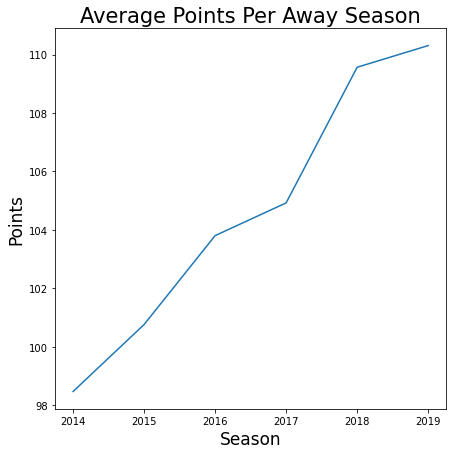

In [25]:
games_fans_away_stats = games_fans[['SEASON', 'PTS_away']]
games_fans_home_stats = games_fans[['SEASON', 'PTS_home']]
games_no_fans_stats = games_no_fans[['SEASON','PTS_away','PTS_home']]

plt.figure(figsize=(7, 7))
plt.xlabel('Season', fontsize = 17)
plt.title('Average Points Per Away Season', fontsize = 21)
plt.ylabel('Points', fontsize = 17)
plt.plot(games_fans_away_stats.groupby('SEASON').agg({'PTS_away': ['mean']}))

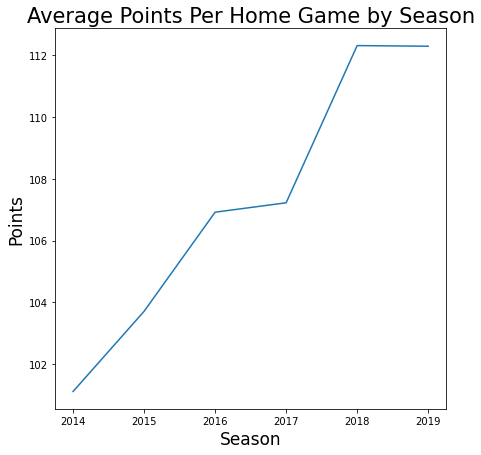

In [26]:
plt.figure(figsize=(7, 7))
plt.xlabel('Season', fontsize = 17)
plt.title('Average Points Per Home Game by Season', fontsize = 21)
plt.ylabel('Points', fontsize = 17)
plt.plot(games_fans_home_stats.groupby('SEASON').agg({'PTS_home': ['mean']}))

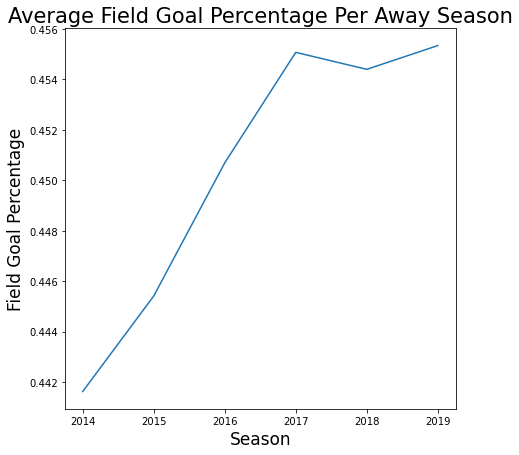

In [27]:
games_fans_away_stats = games_fans[['SEASON', 'FG_PCT_away']]
games_fans_home_stats = games_fans[['SEASON', 'FG_PCT_home']]
games_no_fans_stats = games_no_fans[['SEASON','FG_PCT_away','FG_PCT_home']]

plt.figure(figsize=(7, 7))
plt.xlabel('Season', fontsize = 17)
plt.title('Average Field Goal Percentage Per Away Season', fontsize = 21)
plt.ylabel('Field Goal Percentage', fontsize = 17)
plt.plot(games_fans_away_stats.groupby('SEASON').agg({'FG_PCT_away': ['mean']}))

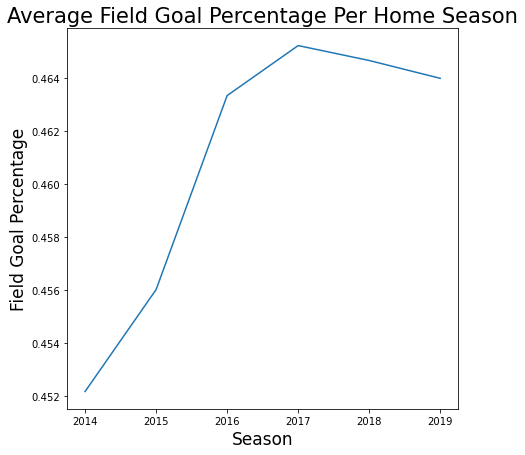

In [28]:
plt.figure(figsize=(7, 7))
plt.xlabel('Season', fontsize = 17)
plt.title('Average Field Goal Percentage Per Home Season', fontsize = 21)
plt.ylabel('Field Goal Percentage', fontsize = 17)
plt.plot(games_fans_home_stats.groupby('SEASON').agg({'FG_PCT_home': ['mean']}))

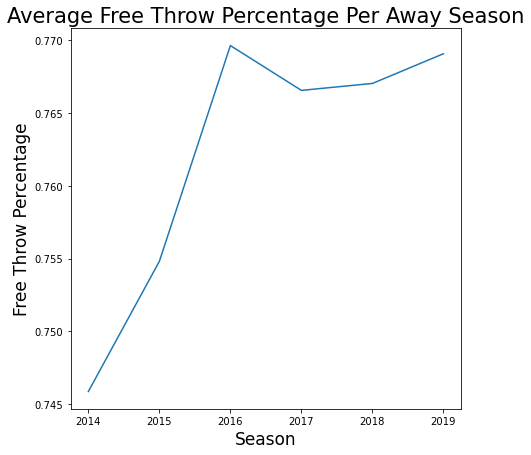

In [29]:
games_fans_away_stats = games_fans[['SEASON', 'FT_PCT_away']]
games_fans_home_stats = games_fans[['SEASON', 'FT_PCT_home']]
games_no_fans_stats = games_no_fans[['SEASON','FT_PCT_away','FT_PCT_home']]

plt.figure(figsize=(7, 7))
plt.xlabel('Season', fontsize = 17)
plt.title('Average Free Throw Percentage Per Away Season', fontsize = 21)
plt.ylabel('Free Throw Percentage', fontsize = 17)
plt.plot(games_fans_away_stats.groupby('SEASON').agg({'FT_PCT_away': ['mean']}))

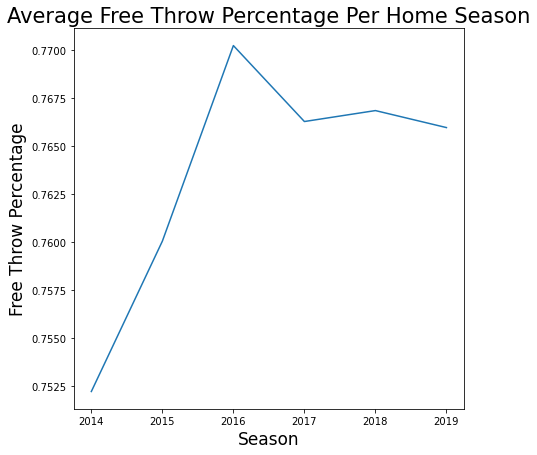

In [30]:
plt.figure(figsize=(7,7))
plt.xlabel('Season', fontsize = 17)
plt.title('Average Free Throw Percentage Per Home Season', fontsize = 21)
plt.ylabel('Free Throw Percentage', fontsize = 17)
plt.plot(games_fans_home_stats.groupby('SEASON').agg({'FT_PCT_home': ['mean']}))

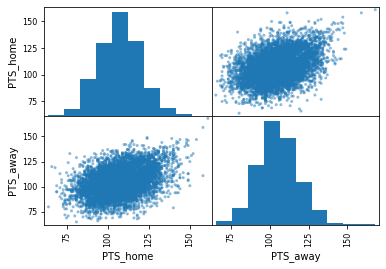

In [31]:
fig_home = pd.plotting.scatter_matrix(games_fans[['PTS_home', 'PTS_away']])


We can now perform some preliminary t tests to observe differences between pre_covid vs post_covid performance in a variety of variables. These include variables like home team's points per game, number of field goals from the home team, number of rebounds, etc. We can then run a t test to determine if there is a significant difference in those variables between pre and post covid. We can look at the preliminary results below:

In [32]:
for col in games_fans.columns[7:]:
    t_val, p_val = ttest_ind(games_fans[col], games_no_fans[col])

    if p_val < 0.01:
        print("Significant difference in ",  col, " in pre vs post covid")
    else:
        print("No significant difference in ", col, " in pre vs post covid")

Significant difference in  PTS_home  in pre vs post covid
No significant difference in  FG_PCT_home  in pre vs post covid
Significant difference in  FT_PCT_home  in pre vs post covid
No significant difference in  FG3_PCT_home  in pre vs post covid
No significant difference in  AST_home  in pre vs post covid
No significant difference in  REB_home  in pre vs post covid
No significant difference in  TEAM_ID_away  in pre vs post covid
Significant difference in  PTS_away  in pre vs post covid
No significant difference in  FG_PCT_away  in pre vs post covid
Significant difference in  FT_PCT_away  in pre vs post covid
No significant difference in  FG3_PCT_away  in pre vs post covid
No significant difference in  AST_away  in pre vs post covid
No significant difference in  REB_away  in pre vs post covid
No significant difference in  HOME_TEAM_WINS  in pre vs post covid


In most of the variables, there does not seem to be a significant difference in pre and post covid performance in many of the variables measured above. However, there were two data points that did have a significant difference, points and free throws. 

We can now perform similar analysis for all our selected players from earlier, and observe any differances in pre and post covid performance.

In [33]:

for player in players:
    fan_data = player_fans_data[player]
    no_fan_data = player_no_fans_data[player]
    
    print("Current player: ", player)
    for col in fan_data.columns[2:]:
        t_val, p_val = ttest_ind(fan_data[col], no_fan_data[col])

        if p_val < 0.01:
            print("Significant difference in ",  col, " in pre vs post covid")
        else:
            print("No significant difference in ", col, " in pre vs post covid")
    print()


Current player:  Buddy Hield
No significant difference in  FGM  in pre vs post covid
No significant difference in  FGA  in pre vs post covid
No significant difference in  FG_PCT  in pre vs post covid
No significant difference in  FG3M  in pre vs post covid
No significant difference in  FG3A  in pre vs post covid
No significant difference in  FG3_PCT  in pre vs post covid
No significant difference in  FTM  in pre vs post covid
No significant difference in  FTA  in pre vs post covid
No significant difference in  FT_PCT  in pre vs post covid
No significant difference in  OREB  in pre vs post covid
No significant difference in  DREB  in pre vs post covid
No significant difference in  REB  in pre vs post covid
No significant difference in  AST  in pre vs post covid
No significant difference in  STL  in pre vs post covid
No significant difference in  BLK  in pre vs post covid
No significant difference in  TO  in pre vs post covid
No significant difference in  PF  in pre vs post covid
No sign

For most of the players, there did not seem to be a huge difference in pre and post covid perforamnce in most variables. Some players like Damina Lillard saw differences in field goal numbers during pre and post covid, as well as players like Kemba Walker. Analyzing individual players was not showing much promise in terms of seeing significant similar differences between players, so we will go back to looking at teams.

We will now display some charts for points and free throw percentage since those showed significant differences. 

In [34]:
games_fans_away_stats = games_fans[['SEASON', 'PTS_away']]
games_fans_home_stats = games_fans[['SEASON', 'PTS_home']]
games_no_fans_stats = games_no_fans[['SEASON','PTS_away','PTS_home']]
games_no_fans_stats 

,SEASON,PTS_away,PTS_home
0,2019,106.0,93.0
1,2019,111.0,108.0
2,2019,102.0,96.0
3,2019,104.0,115.0
4,2019,114.0,124.0
...,...,...,...
165,2019,135.0,140.0
166,2019,125.0,112.0
167,2019,112.0,119.0
168,2019,120.0,129.0


<ipython-input-35-34985dfc5e03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_no_fans_stats['no_fans'] = games_no_fans_stats['PTS_away'].combine_first(games_no_fans_stats['PTS_home'])


<AxesSubplot:title={'center':'Average Points per Game Type'}, xlabel='Game Type', ylabel='Points'>

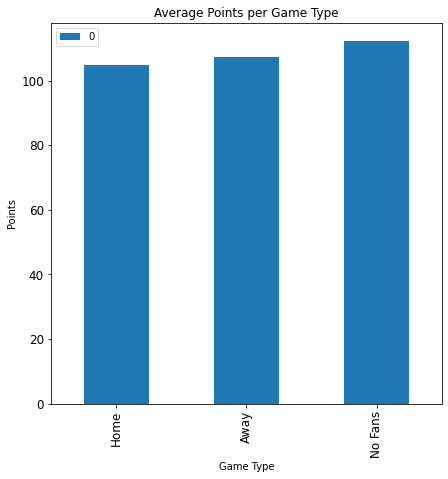

In [35]:
games_fans_away_stats = games_fans[['SEASON', 'PTS_away']]
games_fans_home_stats = games_fans[['SEASON', 'PTS_home']]
games_no_fans_stats = games_no_fans[['SEASON','PTS_away','PTS_home']]
games_no_fans_stats['no_fans'] = games_no_fans_stats['PTS_away'].combine_first(games_no_fans_stats['PTS_home'])

away_pts_avg =  games_fans_away_stats['PTS_away'].mean()
home_pts_avg =  games_fans_home_stats['PTS_home'].mean()
no_pts_avg = games_no_fans_stats['no_fans'].mean()
plotdata = pd.DataFrame(
    {home_pts_avg, away_pts_avg, no_pts_avg}, 
    index=["Home", "Away", "No Fans"])
# Plot a bar chart
plotdata.plot(fontsize=12,title='Average Points per Game Type',kind="bar",figsize=(7,7), ylabel = 'Points', xlabel = 'Game Type')



<ipython-input-36-463dfdd96d33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_no_fans_stats['no_fans'] = games_no_fans_stats['FT_PCT_away'].combine_first(games_no_fans_stats['FT_PCT_home'])


<AxesSubplot:title={'center':'Average Free Throw Percentage per Game Type'}, xlabel='Game Type', ylabel='Points'>

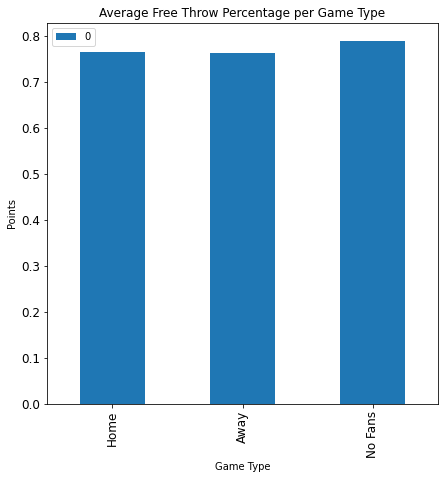

In [36]:
games_fans_away_stats = games_fans[['SEASON', 'FT_PCT_away']]
games_fans_home_stats = games_fans[['SEASON', 'FT_PCT_home']]
games_no_fans_stats = games_no_fans[['SEASON','FT_PCT_away','FT_PCT_home']]
games_no_fans_stats['no_fans'] = games_no_fans_stats['FT_PCT_away'].combine_first(games_no_fans_stats['FT_PCT_home'])

away_ft_avg =  games_fans_away_stats['FT_PCT_away'].mean()
home_ft_avg =  games_fans_home_stats['FT_PCT_home'].mean()
no_ft_avg = games_no_fans_stats['no_fans'].mean()
plotdata = pd.DataFrame(
    {home_ft_avg, away_ft_avg, no_ft_avg}, 
    index=["Home", "Away", "No Fans"])
# Plot a bar chart
plotdata.plot(fontsize=12,title='Average Free Throw Percentage per Game Type',kind="bar",figsize=(7,7), ylabel = 'Points', xlabel = 'Game Type')


As we can see, there were more points scored and more free throws made without fans.

# Ethics & Privacy

The datasets we will be using for this project will be publicly available online and the data is recorded from NBA games whose stats are easily accessible online. We don’t anticipate any issues arising from using any of these datasets in terms of licensing and rights, and we don’t think any of our findings will have any problematic effects if used by others. It is possible that a sports team can use our findings to help them prepare for games but this should not really be an ethical issue.

Our goal will be to eliminate any biases with this project but there are many confounding variables that will be hard to keep track of when asking a question like this. In sports and basketball in particular where many games are decided on fine margins there are many factors that determine a team’s performance besides the fans in the stadium. We will do our best to look at a wide range of data before making any conclusions.

# Conclusion & Discussion

We came into the analysis with the question “does not having fans impact an NBA team's performances on the court (e.g. Wins, Free Throw %, Turnover %, 3 Points made) when compared to performances of home and away teams?” We were pleased with our findings, and we were able to observe a difference with fans. 

Throughout the analysis, we looked at many different data points in a basketball game from points to wins to shooting percentages. Although we were unable to find any similar significant differences between players, but looking at points scored and field goal percentages at overall teams we did. After analyzing the data for those two statistics alone, we saw that no fans in the stadium led to a higher free throw percentage and more points scored than traditional home and away teams with fans in the stadium. The explanation for these two statistical differences can probably boil down to the psychological pressure that playing in front of fans brings to players. Even when teams play at home, having a home court advantage can hurt players when taking free throws. It can also lead to them taking less shots and scoring less points. The significant difference in points however might be because of sample size, as the bubble period only had 170 games compared to 7445 games with fans, and games more recently in general had more points scored than in previous years. Not seeing a similar significant difference between individual players might be attributed to different players responding differently to pressure. It would be interesting to see if players who have played longer in the NBA responded better to pressure than those who did not or vice versa, or if any other factors can affect how players respond to pressure, but that goes beyond the scope of our question. 

Sports analysts and data scientists in the future can use this information to potentially help basketball stars shoot better from the free throw line. Maybe the best way to practice three throws is not to keep shooting, but to work with a sports psychologist to help players focus and work on taking pressure off during shooting. 
